In [1]:
'''Loading dependencies''' 
import sys
sys.path.append('..\\..\\src')

import matplotlib.pyplot as plt
import numpy as np
#import ruptures as rpt
import welly
import pandas as pd
import scipy.stats as stats

#Collections of self built methods
import cp_comparitor as cp_Comp
import change_point_tools as cp_Tools
import well_tools as wtool


In [2]:
path = '..\\..\\data\\raw\\volve_well_data\\'

f1 = welly.Well.from_las(path + '15_9-F-1\\15_9_F1_complete.las')
f1A = welly.Well.from_las(path + '15_9-F-1A\\15_9-F-1A.las')
f1B = welly.Well.from_las(path + '15_9-F-1B\\15_9-F-1B.las')
f1C = welly.Well.from_las(path + '15_9-F-1C\\15_9-F-1C.las')
f11A = welly.Well.from_las(path + '15_9-F-11A\\15_9-F-11A.las')
f11B = welly.Well.from_las(path + '15_9-F-11B\\15_9-F11B.las')

In [3]:


_wellnames = ['df_f1','df_f1A', 'df_f1B', 'df_f1C', 'df_f11A', 'df_f11B']
_wells = [f1, f1A, f1B, f1C, f11A, f11B]
_log_list = ['NPHI','RHOB','GR','DT','PEF']

_logname_extent_min = {'f1': 2620 ,'f1A' : 2620, 'f1B' : 3100 , 'f1C': 3100 , 'f11A' : 2600 , 'f11B': 3200 }
_logname_extent_max = {'f1': 3590 ,'f1A' : 3600, 'f1B' : 3400 , 'f1C': 4100 , 'f11A' : 3700 , 'f11B': 4550 }

In [4]:
#read the LAS files 

df_f1 = _wells[0].df(_log_list)
df_f1A = _wells[1].df(_log_list)
df_f1B = _wells[2].df(_log_list)
df_f1C = _wells[3].df(_log_list)
df_f11A = _wells[4].df(_log_list)
df_f11B = _wells[5].df(_log_list)

#df_f1clip = df_f1[_logname_extent_min['f1']:_logname_extent_max['f1']]
df_f1Aclip = df_f1A[_logname_extent_min['f1A']:_logname_extent_max['f1A']]
#df_f1Bclip = df_f1B[_logname_extent_min['f1B']:_logname_extent_max['f1B']]
#df_f1Cclip = df_f1C[_logname_extent_min['f1C']:_logname_extent_max['f1C']]
#df_f11Aclip = df_f11A[_logname_extent_min['f11A']:_logname_extent_max['f11A']]
#df_f11Bclip = df_f11B[_logname_extent_min['f11B']:_logname_extent_max['f11B']]

df_f1A_roll = _wells[1].df(_log_list)
data_f1A = wtool.compute_all_rolling_avg(df_f1A_roll, window=30, periods=3)

c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\cu

#### Block length benchmarking

##### The length of the input sequence into the SDT Bayesian Offline change point (CP) function can have an effect on the finding of CP probabilities.

In [5]:
''' This cell will take quite some time to compute, 60+ minutes in previous attempts

It will compute the probability of a normalized curve for change points in the dataset, and this is used to display the
relative importance for tuning the Bayesian changepoint algorithm for not only completeness of the solution i.e. find all 
the useful changepoints, but also to not "overspend" on the computing time to achieve this.

As a practical limitation for the framework, a great deal of this computation time can be handled in a step before the
active analysis of input data, but this step will grow proportionally with the increase in input data.'''

#df_f1clip[['CP_Prob_RHOB','CP_Prob_PEF']].plot(alpha=0.7)
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
PEF_seg_1000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=100, method='full_cov', prior='const', engine='numba', normal=True)

#PEF_seg_3000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=300, method='full_cov', prior='const', engine='numba', normal=True)

#PEF_seg_6000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=600, method='full_cov', prior='const', engine='numba', normal=True)

#PEF_ = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=900, method='full_cov', prior='const',  engine='numba', normal=True)

method- full_cov, prior- const, engine- numba
Segmenting into 100
/nmpleted segment 98 from 9700: 9800 of 9800

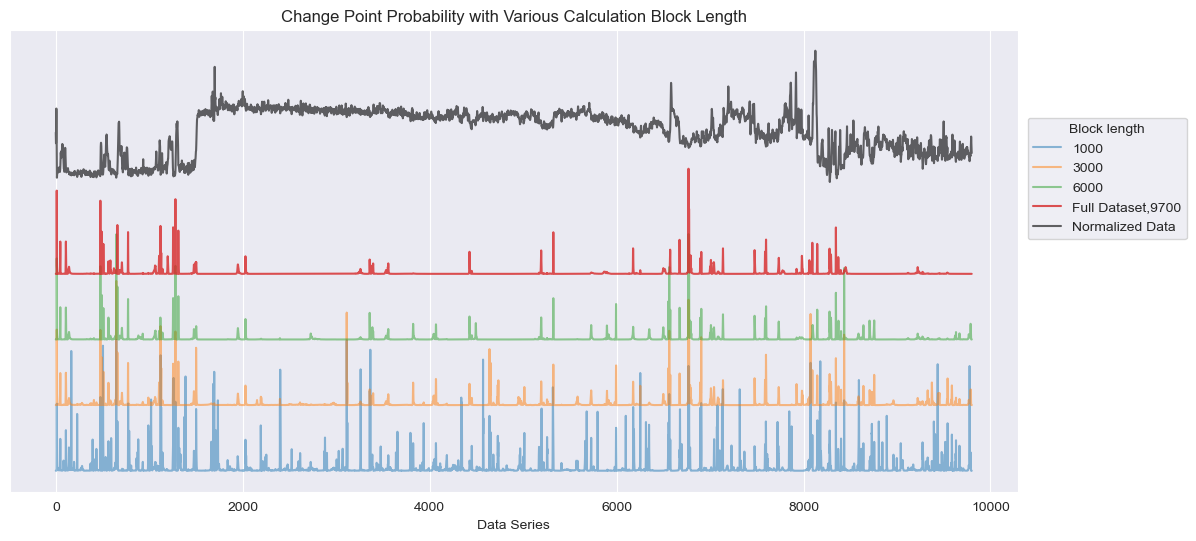

In [6]:
import seaborn as sns


plt.figure(figsize=(13,6))

#plt.plot(PEF_seg_1000-1.5, alpha=0.5, label='CP Probability Segment Size = 1000')
#plt.plot(PEF_seg_3000-1, alpha=0.5, label='CP Probability Segment Size = 3000')
#plt.plot(PEF_seg_6000-.5, alpha=0.5, label='CP Probability Segment Size = 6000')
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
#plt.plot(PEF_, alpha=0.8, label='Full Sequence CP Probability Segment = 9700')
#plt.plot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.4, label='Normalized Data')
#plt.legend(loc='upper right')
#plt.axhline(2.21, alpha=.01)
#plt.title('Effect of segment size with respects to offline Bayesian changepoint calculations');
sns.set_style('darkgrid')
#sns.axes_style()
# sns.dogplot
sns.lineplot(PEF_seg_1000-1.5, alpha=0.5, label='1000')
sns.lineplot(PEF_seg_3000-1, alpha=0.5, label='3000')
sns.lineplot(PEF_seg_6000-.5, alpha=0.5, label='6000')
sns.lineplot(PEF_, alpha=0.8, label='Full Dataset,9700')

sns.lineplot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.6, label='Normalized Data', color='k')

plt.title('Change Point Probability with Various Calculation Block Length')
plt.yticks([])
plt.xlabel('Data Series')
plt.legend(title='Block length', bbox_to_anchor=(1.01, .81), borderaxespad=0)

In [22]:
PEF_prior_const = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='full_cov', prior='const', engine='numba', normal=True)

PEF_prior_geometric = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='full_cov', prior='geometric', p=.00001, engine='numba', normal=True)

# NOT WORKING ::: PEF_prior_neg_binomial = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=800, method='full_cov', prior='neg_binomial', p=.2, k=10, engine='numba', normal=True)

#PEF_ = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=900, p=.1, k=2, method='full_cov', prior='neg_binomial',  engine='numba', normal=True)

method- full_cov, prior- const, engine- numba
Segmenting into 3000
/nmethod- full_cov, prior- geometric, engine- numba
Segmenting into 3000
/nmpleted segment 4 from 9000: 9800 of 9800

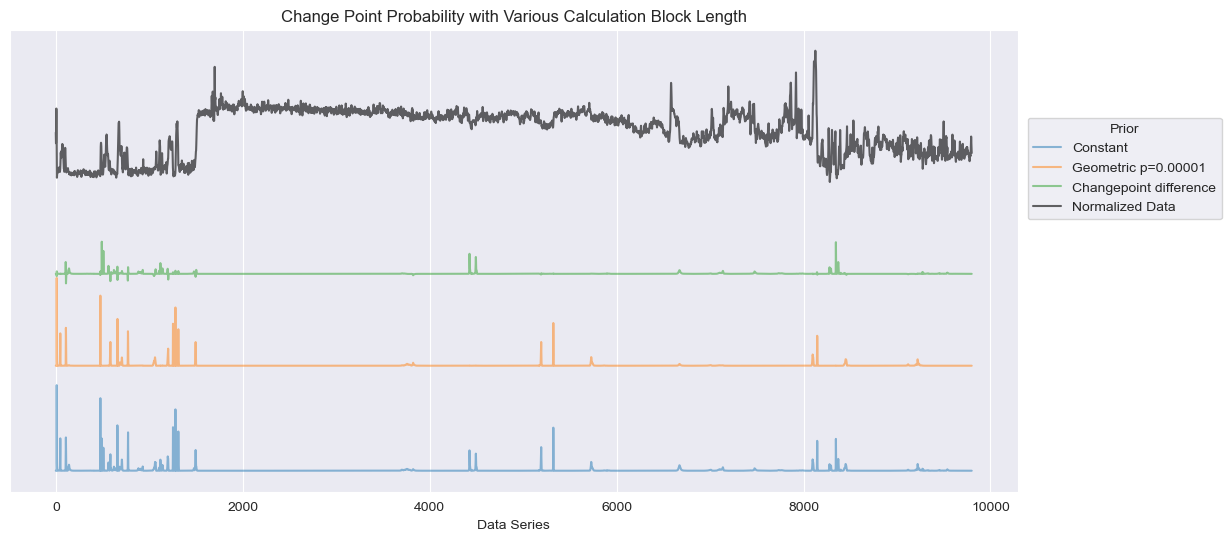

In [28]:
import seaborn as sns
plt.figure(figsize=(13,6))

#plt.plot(PEF_prior_const-1.5, alpha=0.5, label='CP Probability Segment Size = 1000')
#plt.plot(PEF_prior_geometric-1, alpha=0.5, label='CP Probability Segment Size = 3000')
#plt.plot(PEF_prior_neg_binomial-.5, alpha=0.5, label='CP Probability Segment Size = 6000')
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
#plt.plot(PEF_, alpha=0.8, label='Full Sequence CP Probability Segment = 9700')
#plt.plot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.4, label='Normalized Data')
#plt.legend(loc='upper right')
#plt.axhline(2.21, alpha=.01)
#plt.title('Effect of segment size with respects to offline Bayesian changepoint calculations');
sns.set_style('darkgrid')
#sns.axes_style()
# sns.dogplot
sns.lineplot(PEF_prior_const-1.5, alpha=0.5, label='Constant')
sns.lineplot(PEF_prior_geometric-.7, alpha=0.5, label='Geometric p=0.00001')
sns.lineplot(PEF_prior_const-PEF_prior_geometric, alpha=0.5, label='Changepoint difference')
#sns.lineplot(PEF_, alpha=0.8, label='Full Dataset,9700')

sns.lineplot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.6, label='Normalized Data', color='k')

plt.title('Change Point Probability with Various Calculation Block Length')
plt.yticks([])
plt.xlabel('Data Series')
plt.legend(title='Prior', bbox_to_anchor=(1.01, .81), borderaxespad=0)

In [29]:

PEF_method_gauss = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='gauss', prior='geometric', p=0.00001, engine='numba', normal=True)

PEF_method_ifm = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='ifm', prior='geometric', p=.00001, engine='numba', normal=True)

PEF_prior_full_cov = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='full_cov', prior='geometric', p = 0.00001, engine='numba', normal=True)

#PEF_prior_geometric = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0), segment_length=3000, method='full_cov', prior='geometric', p=.00001, engine='numba', normal=True)



method- gauss, prior- geometric, engine- numba
Segmenting into 3000
/nmethod- ifm, prior- geometric, engine- numba
Segmenting into 3000
/nmethod- full_cov, prior- geometric, engine- numba
Segmenting into 3000
/nmpleted segment 4 from 9000: 9800 of 9800

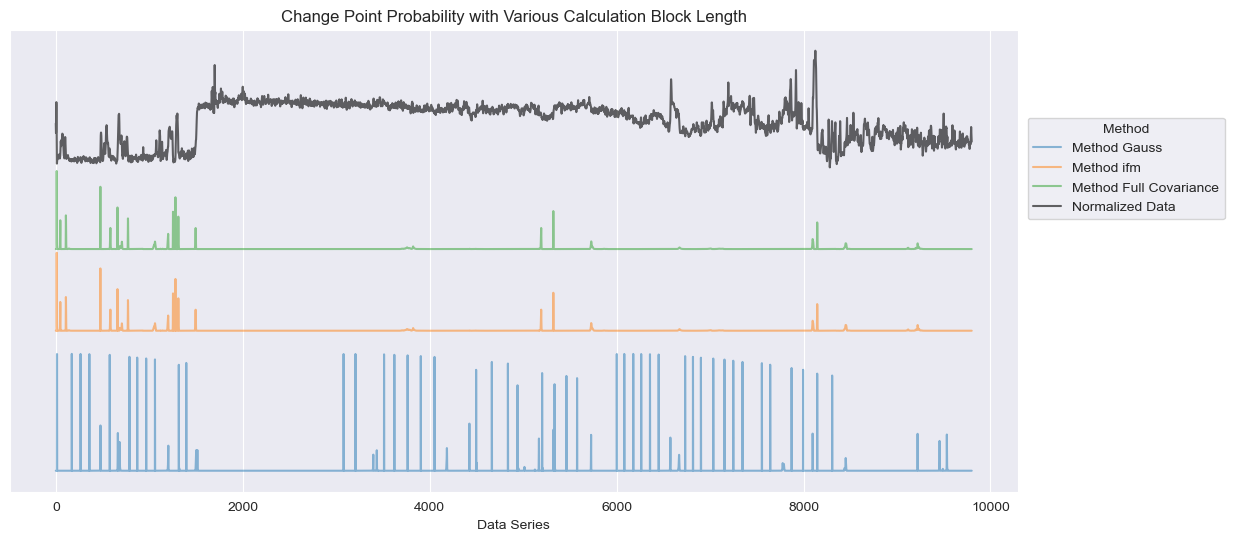

In [31]:
import seaborn as sns
plt.figure(figsize=(13,6))

#plt.plot(PEF_prior_const-1.5, alpha=0.5, label='CP Probability Segment Size = 1000')
#plt.plot(PEF_prior_geometric-1, alpha=0.5, label='CP Probability Segment Size = 3000')
#plt.plot(PEF_prior_neg_binomial-.5, alpha=0.5, label='CP Probability Segment Size = 6000')
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
#plt.plot(PEF_, alpha=0.8, label='Full Sequence CP Probability Segment = 9700')
#plt.plot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.4, label='Normalized Data')
#plt.legend(loc='upper right')
#plt.axhline(2.21, alpha=.01)
#plt.title('Effect of segment size with respects to offline Bayesian changepoint calculations');
sns.set_style('darkgrid')
#sns.axes_style()
# sns.dogplot
PEF_method_full_cov = PEF_prior_full_cov
sns.lineplot(PEF_method_gauss-1.9, alpha=0.5, label='Method Gauss')
sns.lineplot(PEF_method_ifm-.7, alpha=0.5, label='Method ifm')
sns.lineplot(PEF_method_full_cov, alpha=0.5, label='Method Full Covariance')
#sns.lineplot(PEF_, alpha=0.8, label='Full Dataset,9700')

sns.lineplot(cp_Tools.normalize_array(df_f1Aclip['PEF'].values,0,0)+.7, alpha=0.6, label='Normalized Data', color='k')

plt.title('Change Point Probability with Various Calculation Block Length')
plt.yticks([])
plt.xlabel('Data Series')
plt.legend(title='Method', bbox_to_anchor=(1.01, .81), borderaxespad=0)